# Relevant Information: 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
### Attribute Information
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
    * 1 = the patient survived 5 years or longer
    * 2 = the patient died within 5 year

### My assumption
1. Younger patient has more probality of survival.
2. patient with less number of nodes has more probality of survival
3. Combination of both patients are more likely to survive.


In [ ]:
import pandas as pd
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore") 

In [ ]:
haberman = pd.read_csv("/content/drive/My Drive/AAIC_assignments/haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Common details

In [ ]:
def details(dataset):
    print("Shape of data set:",haberman.shape)
    print(f"Number of rows:{haberman.shape[0]}\nNumber of Columns:{haberman.shape[1]}")
    print("Columns:",haberman.columns)
    print("data types:\n",haberman.dtypes)
details(haberman)

Shape of data set: (306, 4)
Number of rows:306
Number of Columns:4
Columns: Index(['age', 'year', 'nodes', 'status'], dtype='object')
data types:
 age       int64
year      int64
nodes     int64
status    int64
dtype: object


### Observations
1. It has only numerical variables
2. 'status' columns is our target variable

In [ ]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

For the convinence make the target variable 1 and 0. Replace all 2 with 0
* 1 = the patient survived 5 years or longer
* 0 = the patient died within 5 year


* this is imbalance data (it's good more people are survived)

In [ ]:
haberman['status'] = haberman['status'].apply(lambda x : 0 if x== 2 else 1)
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Exploratory data analysis and visualization

* Uni-variate Analysis

### Questions
1. How is the age distributed?
2. How many nodes are there?

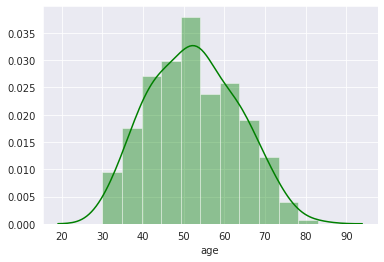

In [ ]:

sns.set_style('darkgrid')
sns.distplot(haberman['age'],hist=True,kde = True,color= 'g')
plt.show()


# Observation
1. Age is normally distributed

Text(0.5, 1.0, 'Box plot for age')

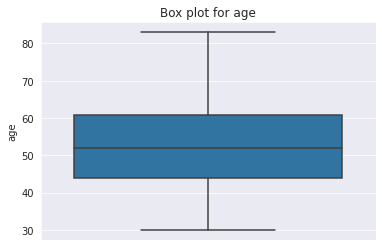

In [ ]:
sns.boxplot(haberman['age'],data = haberman,orient='v')
plt.title("Box plot for age")

# Observation
* means age is around 50
 
* No outliers verify this using Q1- 1.5*IQR,Q3+1.5* IQR

In [ ]:
print("Mean age is:",haberman['age'].mean())

Mean age is: 52.45751633986928


In [ ]:
import numpy as np
#haberman['age'].loc[haberman['age']>= np.percentile()]
Q1 = np.percentile(haberman['age'],q=25)
print(Q1)
Q3 = np.percentile(haberman['age'],q=75)
print(Q3)
IQR = Q3-Q1
print(IQR)
low = Q1- 1.5 * IQR
high = Q3 + 1.5 * IQR
print(low,high)

print(haberman['age'].loc[(haberman['age'] <= low) | (haberman['age'] > high )])

44.0
60.75
16.75
18.875 85.875
Series([], Name: age, dtype: int64)


No such values found means our observation is corect

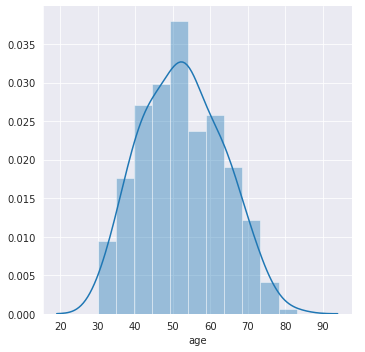

In [ ]:
import matplotlib.pyplot as plt
sns.FacetGrid(haberman,size=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.show()


* Age's distribution is "Normal distribution"

# tabular method

In [ ]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


### Observations
* Mean age is 52 
* No missing values

In [ ]:
haberman.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

### Check the distribution of 'nodes'

In [ ]:
print("nodes and it's count:",haberman['nodes'].value_counts().to_dict())
print("percentage of each nodes:",list(round(haberman['nodes'].value_counts()/len(haberman['nodes'])*100,2)))

nodes and it's count: {0: 136, 1: 41, 2: 20, 3: 20, 4: 13, 6: 7, 7: 7, 8: 7, 5: 6, 9: 6, 13: 5, 14: 4, 11: 4, 10: 3, 15: 3, 19: 3, 22: 3, 23: 3, 12: 2, 20: 2, 46: 1, 16: 1, 17: 1, 18: 1, 21: 1, 24: 1, 25: 1, 28: 1, 30: 1, 35: 1, 52: 1}
percentage of each nodes: [44.44, 13.4, 6.54, 6.54, 4.25, 2.29, 2.29, 2.29, 1.96, 1.96, 1.63, 1.31, 1.31, 0.98, 0.98, 0.98, 0.98, 0.98, 0.65, 0.65, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33]


* 75.17% patients had nodes <=4 i.e <=mean

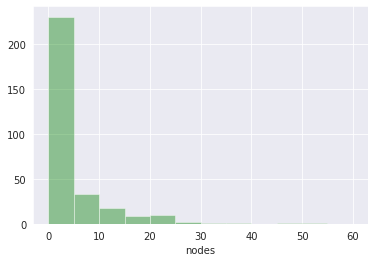

In [ ]:
sns.set_style('darkgrid')
sns.distplot(haberman['nodes'],hist=True,kde = False,bins = [0,5,10,15,20,25,30,35,40,45,50,55,60],color= 'g' )

Text(0.5, 1.0, 'age vs nodes lineplot')

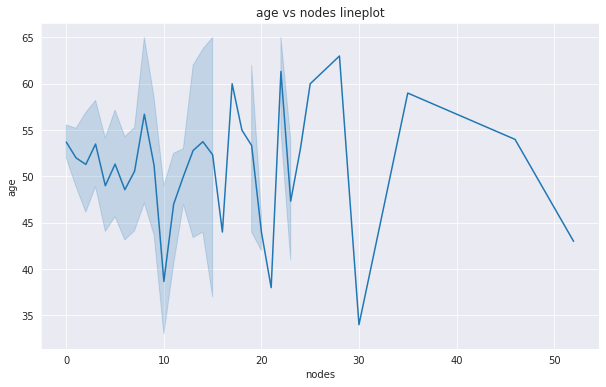

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x = haberman['nodes'],y = haberman['age'])
plt.title("age vs nodes lineplot")

In [ ]:
from collections import Counter
print(Counter(haberman.loc[haberman['nodes'] <=4]['age'].tolist()))
print(haberman.loc[haberman['nodes'] <=4]['age'].tolist())
print(len(haberman.loc[haberman['nodes'] <=4]['age'])/len(haberman)* 100)

Counter({52: 13, 50: 10, 43: 9, 49: 9, 42: 8, 47: 8, 53: 8, 57: 8, 65: 8, 38: 7, 41: 7, 45: 7, 58: 7, 61: 7, 39: 6, 55: 6, 56: 6, 59: 6, 63: 6, 46: 5, 54: 5, 67: 5, 70: 5, 37: 4, 51: 4, 60: 4, 62: 4, 64: 4, 66: 4, 72: 4, 30: 3, 34: 3, 40: 3, 44: 3, 48: 3, 69: 3, 31: 2, 36: 2, 68: 2, 73: 2, 74: 2, 33: 1, 35: 1, 71: 1, 75: 1, 76: 1, 77: 1, 78: 1, 83: 1})
[30, 30, 30, 31, 31, 33, 34, 34, 34, 35, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 

* Age and nodes are not co-related but we can observe onething that patients having node <=4 are of age between 48 and 55

### Observations
1. 44% patintent had 0 nodes 13 % has 1 node total 57 % had either 0 or 1 node

**Node can be a good classifer**

Text(0.5, 1.0, 'box plot for nodes')

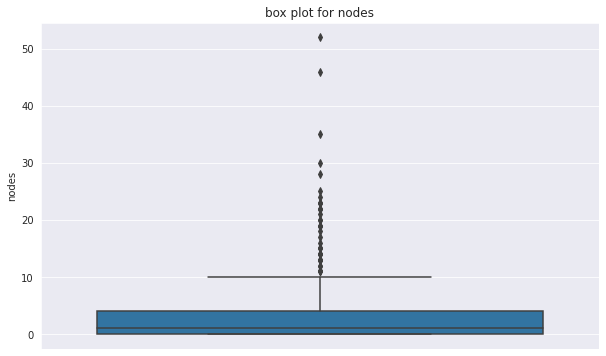

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(haberman['nodes'],data = haberman,orient='v')
plt.title("box plot for nodes")

* Average number of node is 4

In [ ]:
haberman['nodes'].mean()

4.026143790849673

In [ ]:
Q1 = np.percentile(haberman['nodes'],q=25)
print(Q1)
Q3 = np.percentile(haberman['nodes'],q=75)
print(Q3)
IQR = Q3-Q1
print(IQR)
low = Q1- 1.5 * IQR
high = Q3 + 1.5 * IQR
print(low,high)

print(len(haberman['nodes'].loc[(haberman['nodes'] <= low) | (haberman['nodes'] > high )]))

0.0
4.0
4.0
-6.0 10.0
40


### Check year
* assumptions:
1. year can't be a classifier becoz it's just a Patient's year of operation

2. But we can observe the trend of survival based on operation year

In [ ]:
haberman['year'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

### Observations
1. almost equal number of oprations performed in every year except 68 and 69 

# Bi-variate analysis
* we will look for 2 variables at a time

### Age vs Sttatus

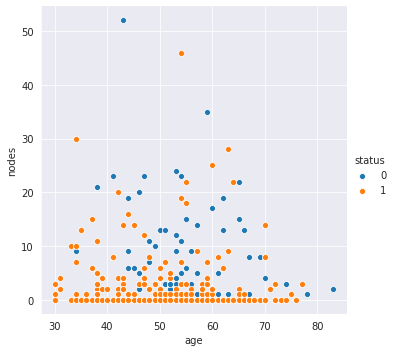

In [ ]:
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
sns.FacetGrid(haberman,hue = 'status',size = 5).map(sns.scatterplot,'age','nodes').add_legend()
plt.show()

### Observations
1. all patinents with **'0'** nodes are survived irrespective of their **age**
2. 90% of the  patients with 1 nodes are also survived 

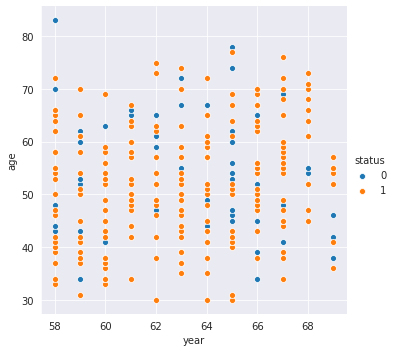

In [ ]:
sns.FacetGrid(haberman,hue = 'status',height = 5).map(sns.scatterplot,'year','age').add_legend()

### Observation
1. Every year has similar trend of survival (Not a good classifier)

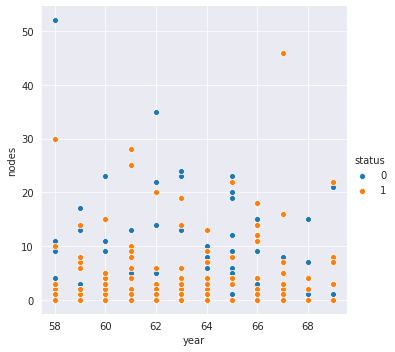

In [ ]:
sns.FacetGrid(haberman,hue = 'status',height = 5).map(sns.scatterplot,'year','nodes').add_legend()

### Observations
1. nodes vs year also displays that less number of nodes more survival

# Distribution plots

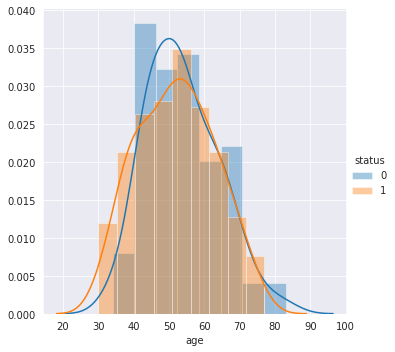

**************************************************


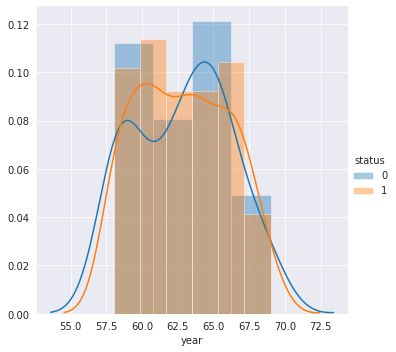

**************************************************


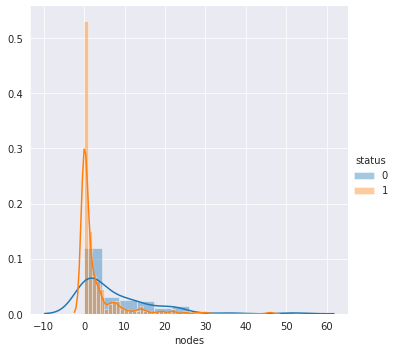

**************************************************


In [ ]:
#fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    
    fg = sns.FacetGrid(haberman, hue='status', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()
    print("*" * 50)

# Observations
1. Age and survival has normal distribution 
2. 81% patitens with  nodes <=4 are  survived  and 19% not survived (verified by code)

In [ ]:
haberman.loc[haberman['nodes'] <=4]['status'].value_counts()/len(haberman.loc[haberman['nodes'] <=4]['status']) * 100 

1    81.73913
0    18.26087
Name: status, dtype: float64

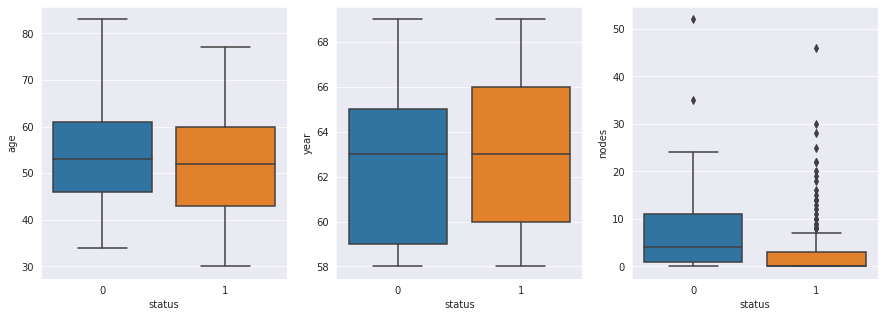

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=haberman, ax=axes[idx])
plt.show()  

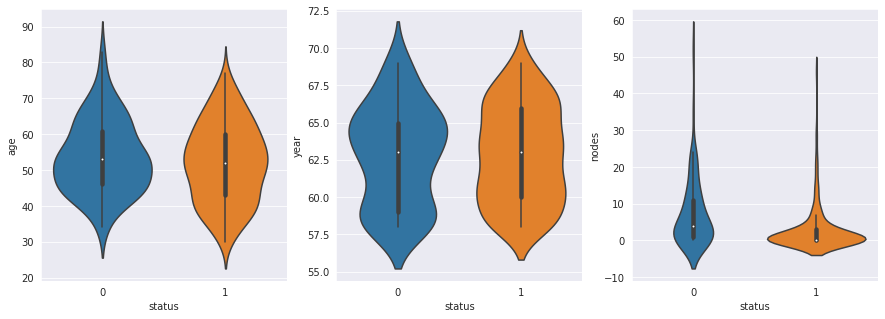

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=haberman, ax=axes[idx])
plt.show() 

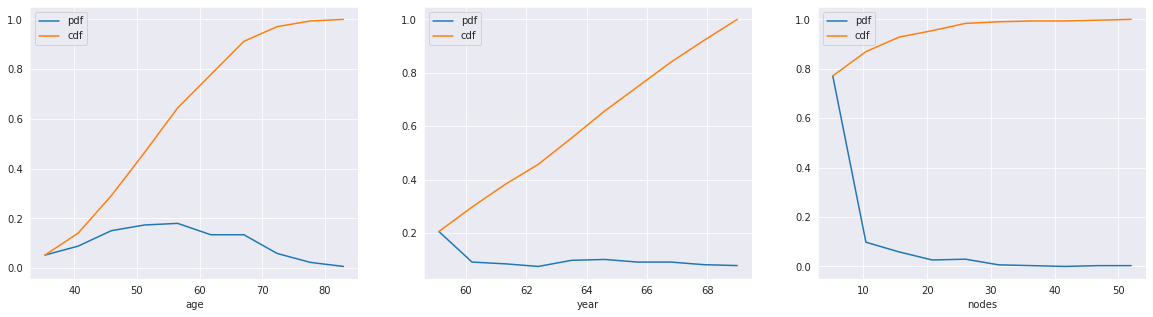

In [ ]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    counts, bin_edges = np.histogram(haberman[feature], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.legend(['pdf','cdf'])
    plt.xlabel(feature)

* more than 80% patients has survived who had 0-2 nodes

# Multivariate Analysis

1. Pairplot

Text(0.5, 1.0, 'pairplot')

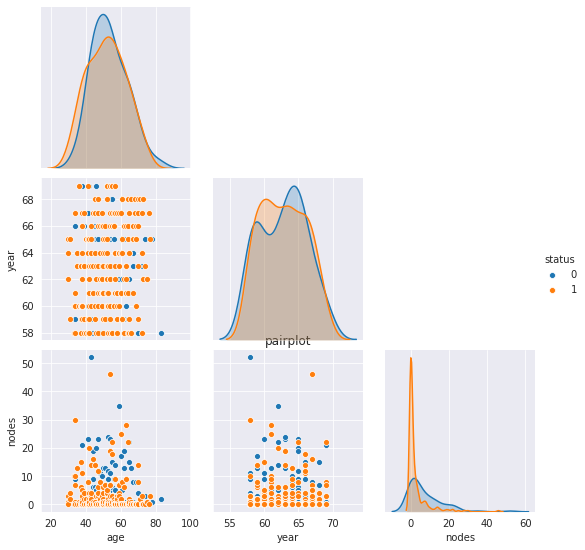

In [ ]:
sns.pairplot(haberman,hue= 'status',corner= True)
plt.title("pairplot")

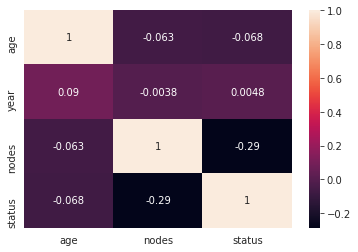

In [ ]:
sns.heatmap(data= haberman.corr()[['age','nodes','status']],annot = True)

In [ ]:
haberman.corr()[['age','nodes','status']]

,age,nodes,status
age,1.000000,-0.063176,-0.067950
year,0.089529,-0.003764,0.004768
nodes,-0.063176,1.000000,-0.286768
status,-0.067950,-0.286768,1.000000


* No such strong co-relation between any variable

# All observations
1. Age is normally distributed
2. Maximum patients had nodes <=4
3. Max patients with nodes <=4 are survived
3. Age and survival has no relation Year is just to show the year of operation
5. almost equal number of oprations performed in every year